# MNIST 이미지 인식

## 손글씨 숫자 인식
- colab에서 실행

In [9]:
import plaidml.keras
plaidml.keras.install_backend()

AttributeError: partially initialized module 'plaidml' has no attribute 'exceptions' (most likely due to a circular import)

In [22]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# !pip install tensorflow
# !pip install keras
# python -m pip install --upgrade pip

SyntaxError: invalid syntax (3991038057.py, line 3)

In [4]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

## MNIST 이미지 확인

11501568/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

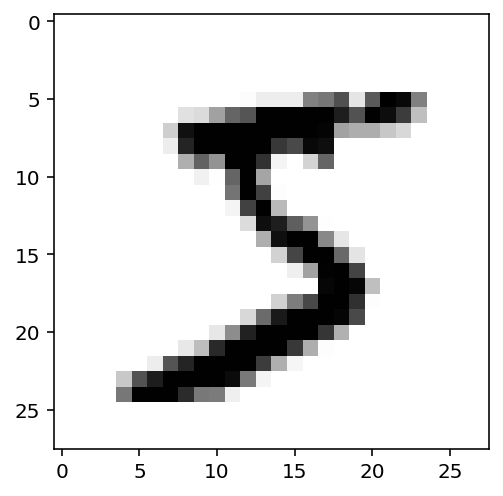

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터를 입력으로 사용한다
- 목적 변수는 원 핫 인코딩을 한다. to_categorical를 사용한다

In [8]:
X_train = train_images.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255

X_test = test_images.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

y_train_cat = to_categorical(train_labels) # One hot encoding
y_test_cat = to_categorical(test_labels)

In [9]:
y_train_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# MLP 모델

In [10]:
model_m = models.Sequential()
model_m.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model_m.add(layers.Dense(100, activation='relu'))
model_m.add(layers.Dense(10, activation='softmax'))
model_m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


2022-10-22 16:32:29.360965: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
# 다른 최적화 알고리즘 'rmsprop'
# 레이블로 원 핫 인코딩을 사용해야 한다
h = model_m.fit(X_train,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

2022-10-22 16:34:56.498140: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2400/2400 [==============================] - 3s 975us/step - loss: 0.2511 - accuracy: 0.9255 - val_loss: 0.1291 - val_accuracy: 0.9620
Epoch 2/30
2400/2400 [==============================] - 2s 884us/step - loss: 0.1062 - accuracy: 0.9671 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 3/30
2400/2400 [==============================] - 2s 900us/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.1093 - val_accuracy: 0.9672
Epoch 4/30
2400/2400 [==============================] - 2s 928us/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.1110 - val_accuracy: 0.9693
Epoch 5/30
2400/2400 [==============================] - 2s 910us/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.1091 - val_accuracy: 0.9702
Epoch 6/30
2400/2400 [==============================] - 2s 967us/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.1134 - val_accuracy: 0.9725
Epoch 7/30
2400/2400 [==============================] - 2s 919us/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.1188 -

In [12]:
def show_4_graphs(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

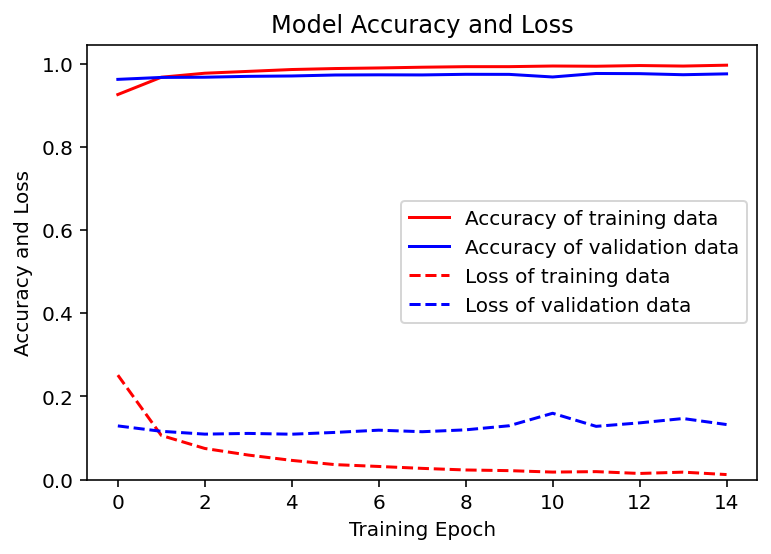

In [13]:
show_4_graphs(h)

In [14]:
test_loss, test_acc = model_m.evaluate(X_test, y_test_cat)
print('loss, acc = ',test_loss, test_acc)

313/313 [==============================] - 0s 970us/step - loss: 0.1159 - accuracy: 0.9768
loss, acc =  0.11593042314052582 0.9768000245094299


###  예측에 사용하기
- agrmax()로 판별

In [15]:
model_m.predict(X_train[0:3])

array([[7.91672263e-17, 7.60077973e-11, 1.45157624e-17, 3.33658827e-05,
        1.34299364e-20, 9.99966621e-01, 5.26578835e-19, 4.97104198e-18,
        1.68354575e-14, 3.55629193e-10],
       [1.00000000e+00, 3.34042904e-25, 3.23947475e-15, 1.46667613e-24,
        2.79794630e-21, 4.49351501e-24, 1.66625966e-16, 8.64251229e-21,
        5.68281159e-22, 8.43721048e-16],
       [2.92712329e-23, 7.29734944e-14, 5.04418708e-15, 1.23045684e-16,
        1.00000000e+00, 1.85874830e-23, 5.33928404e-21, 1.12539868e-15,
        2.36895304e-18, 2.72423945e-12]], dtype=float32)

In [16]:
np.argmax(model_m.predict(X_train[0:3]), axis=1)

array([5, 0, 4])

# CNN 모델
- 입력으로 4차원 구조를 필요로 한다
- (샘플수, 행, 열, 특성수)

In [17]:
X_train_cnn = train_images.reshape(-1,28,28,1)
X_test_cnn = test_images.reshape(-1,28,28,1)

In [18]:
from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28,1)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [23]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
# 다른 최적화 알고리즘 'rmsprop'
# 레이블로 원 핫 인코딩을 사용해야 한다
h = model_cnn.fit(X_train_cnn,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0337 - accuracy: 0.9933 - val_loss: 0.1428 - val_accuracy: 0.9842
Epoch 2/30
2400/2400 [==============================] - 42s 18ms/step - loss: 0.0350 - accuracy: 0.9939 - val_loss: 0.1414 - val_accuracy: 0.9830
Epoch 3/30
2400/2400 [==============================] - 44s 18ms/step - loss: 0.0296 - accuracy: 0.9945 - val_loss: 0.0994 - val_accuracy: 0.9877
Epoch 4/30
2400/2400 [==============================] - 39s 16ms/step - loss: 0.0280 - accuracy: 0.9949 - val_loss: 0.1408 - val_accuracy: 0.9859
Epoch 5/30
2400/2400 [==============================] - 43s 18ms/step - loss: 0.0296 - accuracy: 0.9949 - val_loss: 0.1646 - val_accuracy: 0.9857
Epoch 6/30
2400/2400 [==============================] - 43s 18ms/step - loss: 0.0351 - accuracy: 0.9949 - val_loss: 0.1531 - val_accuracy: 0.9855


In [20]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.1007 - accuracy: 0.9863
test_acc =  0.986299991607666


In [21]:
import tensorflow as tf
print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


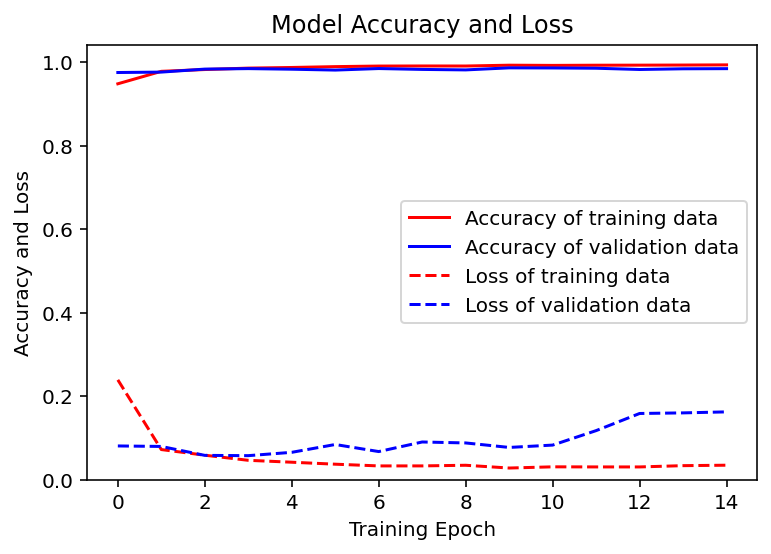

In [25]:
show_4_graphs(h)

# (참고) MLP를 이용한  회귀 예측

In [ ]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)

x_train[:3]

57344/57026 [==============================] - 0s 0us/step
(404, 13)


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (13,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

In [ ]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=1)

Epoch 1/32
51/51 [==============================] - 1s 3ms/step - loss: 564.5105
Epoch 2/32
51/51 [==============================] - 0s 3ms/step - loss: 555.5033
Epoch 3/32
51/51 [==============================] - 0s 3ms/step - loss: 549.1380
Epoch 4/32
51/51 [==============================] - 0s 3ms/step - loss: 552.7486
Epoch 5/32
51/51 [==============================] - 0s 3ms/step - loss: 552.4536
Epoch 6/32
51/51 [==============================] - 0s 3ms/step - loss: 464.8878
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 419.5520
Epoch 8/32
51/51 [==============================] - 0s 3ms/step - loss: 372.0489
Epoch 9/32
51/51 [==============================] - 0s 3ms/step - loss: 367.8768
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 296.6314
Epoch 11/32
51/51 [==============================] - 0s 3ms/step - loss: 281.5601
Epoch 12/32
51/51 [==============================] - 0s 3ms/step - loss: 229.5137
Epoch 13/32
51/51 [======

In [ ]:
model.predict(x_test[:10])

array([[ 5.4104795],
       [17.70508  ],
       [23.116293 ],
       [25.728487 ],
       [23.626768 ],
       [19.791151 ],
       [24.890017 ],
       [23.799665 ],
       [20.466646 ],
       [17.061724 ]], dtype=float32)

In [ ]:
y_test[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

In [ ]:
import pandas as pd
y_pred = model.predict(x_test).ravel()
df = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
df[:5]

,y_pred,y_test
0,5.410481,7.2
1,17.705080,18.8
2,23.116295,19.0
3,25.728481,27.0
4,23.626768,22.2


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.09123458483688496

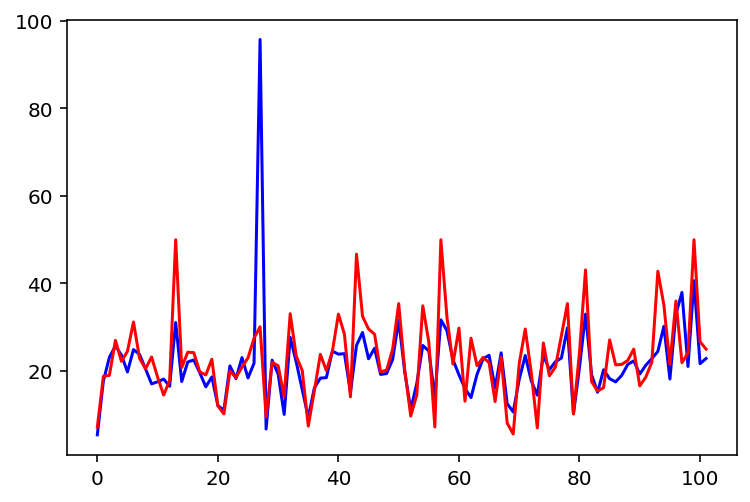

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred, c='b')
plt.plot(y_test, c='r')

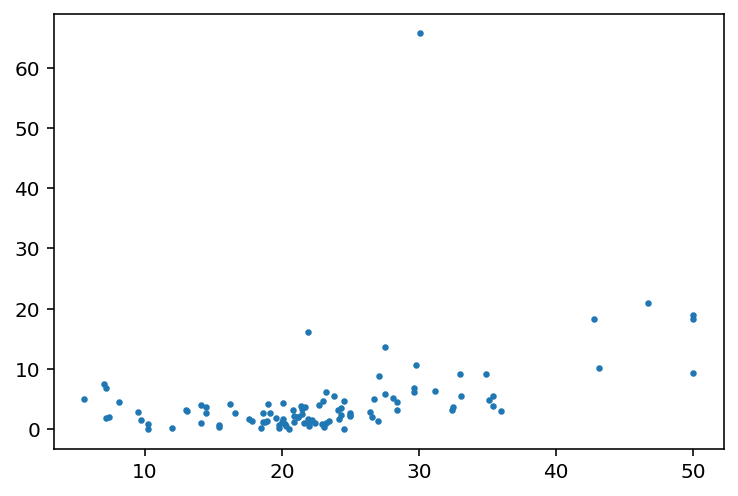

In [ ]:
plt.scatter(y_test, np.abs(y_test-y_pred), s=5)

In [ ]:
history.history.keys()

dict_keys(['loss'])

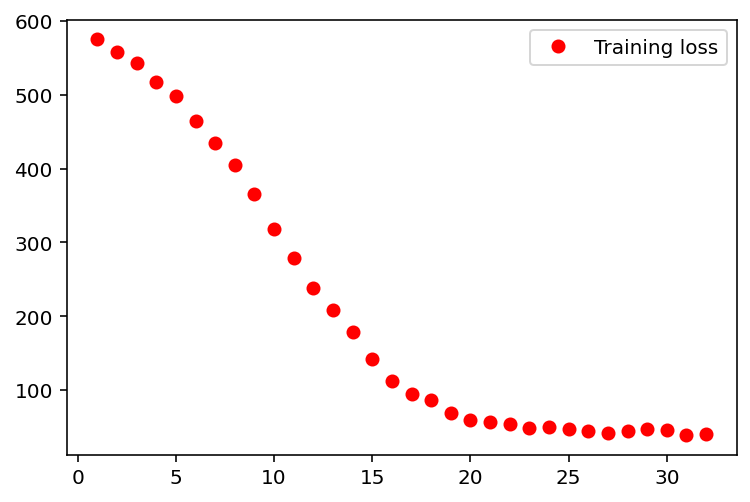

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()